# pendulo  con masa movil (solución por odeint)

vamos a solucionar  un problema de un pendulo con una masa movil, para el analisis matematico  usaremos el lagrangiano, planteamos las posiciones de la particula del pendulo y de la msa movil la cual solo va a estar variando 
en x, se espera observar variaciones en la posición de la masa cuando el pendulo este en movimiento 

\begin{equation}
\frac{\partial}{\partial t} \left(\frac{\partial L}{\partial q_i}\right)=\frac{\partial L}{\partial q_i}
\end{equation}


Utilizando la ecuación anterior, 
podemos empezar consiguiendo la expresión para nuestro 
lagrangiano:


\begin{equation}
L=T-U
\end{equation}

si:
l= longitud de los péndulos.
m= masa del péndulo.
M= masa movil .
$\theta$= ángulo de oscilación péndulo 



Para las posiciones tenemos:

\begin{equation*}
x_{2}=x_{1}+l\sin \theta 
\end{equation*}

\begin{equation*}
y_{2}=-l \cos \theta 
\end{equation*}

\begin{equation*}
\dot{x_2} =\dot{x_1}+l \dot{\theta } \cos\theta 
\end{equation*}

\begin{equation*}
\dot{y_2} =l \dot{\theta } \sin\theta 
\end{equation*}




energia cinetica 

\begin{equation*}
T=\frac{1}{2} m \dot{x_{1}^{2}}+ {\frac{1}{2}} m(\dot{x_{1}^{2}} +l^{2} \dot{\theta^{2} } +2\dot{x_{1}} \dot{\theta } \sin\theta  ) 
\end{equation*}



la energia potencial 
\begin{equation*}
v=M g y_{2}= -Mgl \cos\theta 
\end{equation*}



por tanto el lagrangiano nos quedaria 
\begin{equation}
L=T-U= \frac{1}{2} (m+M) \dot{x_{1}^{2}}+  {\frac{1}{2}} M( l^{2} \dot{\theta^{2} } +2\dot{x_{1}} \dot{\theta } l\sin\theta  ) 
+Mgl \cos\theta
\end{equation}


a partir de esto calculamos las ecuaciones que vamos a emplear para utilizarlas en nuestro programa primero tenemos que tomar las derivadas del lagranfiano las cuales son 


\begin{equation}
\frac{\partial}{\partial t} \left(\frac{\partial L}{\partial \dot{x}_{1}}\right)=\frac{\partial L}{\partial x_{1}}
\end{equation}

\begin{equation}
\frac{\partial}{\partial t} \left(\frac{\partial L}{\partial \dot{\theta }_{1}}\right)=\frac{\partial L}{\partial \theta _{1}}
\end{equation}





ahora nuestras ecuaciones serian 

\begin{equation}
\ddot{\theta}= \frac{(\frac{-g}{l})sin\theta -(\frac{m}{m+M})\dot{\theta^{2}}\cos\theta \sin \theta }{(1+(\frac{m}{m+M})\cos ^{2}\theta )}
\end{equation}



\begin{equation}
\ddot{x} = \frac{m\dot{\theta^{2}l\sin\theta - m \ddot{\theta} l \cos\theta}}{(m+M)}
\end{equation}


estas ecuaciopnes estan propuestas dentro de la funcion que definimos como pendulo

In [9]:
from numpy import array, linspace
from math import sin, cos, pi,tan 
from pylab import plot, xlabel, ylabel, show
from scipy.integrate import odeint
from vpython import sphere, scene, vector, color, arrow, text, sleep, box
import matplotlib.pyplot as plt


In [10]:
arrow_size = 0.5
# definimos 
arrow_x = arrow(pos=vector(0,0,0), axis=vector(arrow_size,0,0), color=color.red)
arrow_y = arrow(pos=vector(0,0,0), axis=vector(0,arrow_size,0), color=color.green)
arrow_z = arrow(pos=vector(0,0,0), axis=vector(0,0,arrow_size))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
#parametros
m=1 #masa pendulo
M=0.1 #masa bloque
l =1 #longitud de la cuerda
g=9.8 #aceleracion de la gravedad en la tierra

In [12]:
def pendulo (init, t):
        
    m=1 #masa pendulo
    M=0.1 #masa bloque
    l =1 #longitud de la cuerda
    g=9.8 #aceleracion de la gravedad en la tierra
    
    w=init[0]  
    x=init[1]  
    
    dx=init[2] 
    dw=init[3] 
           
    dv_w= (((-g/l)*sin(w)-(m/(m+M))*dw*dw*sin(w)*cos(w))/(1+(m/(m+M))*cos(w)*cos(w)))  # aceleracion angular x
    dv_x= ((m*dw*dw*l*sin(w)-m*dv_w*l*cos(w))/(m+M) ) #aceleracion x
    print(dv_x, dv_w, x, w, dx, dw)
    
    
    #return array([dv_w,dv_x,dw,dx],float)
    return array([dw,dx, w, x],float)
    
n_steps = 1000
t_start = 0.
t_final = 15.
t_delta = (t_final - t_start) / n_steps 

t = linspace(t_start, t_final, n_steps)

init= [3*pi/180., 1 ,0 ,0] # condiciones iniciales 

sol,outodeint = odeint(pendulo, init, t, full_output=True)
vww, vxx, ww, xx = sol.T # salida velocidad angular x y y y posicion en x y y 


0.24421828412772292 -0.26900877972382126 1.0 0.05235987755982988 0.0 0.0
0.2442182841279587 -0.2690087797239049 1.0 0.05235987755982988 9.595907756594446e-08 1.8326833834990394e-06
0.24421828414360822 -0.2690087797411903 1.0000000000001759 0.05235987756318861 9.595907756594446e-08 1.8326833834990394e-06
0.24421828415996497 -0.2690087797587268 1.0000000000003517 0.05235987756654734 1.9191815514419989e-07 3.6653667669987234e-06
0.24421828417561442 -0.2690087797760122 1.0000000000005276 0.05235987756990607 1.9191815515035538e-07 3.6653667669990457e-06
0.2442569797732285 -0.2690506718814557 1.000000422125157 0.05236793955646887 0.0002102494638869962 0.004015468412641519
0.24425697977371952 -0.2690506718816408 1.0000004221252161 0.05236793955647197 0.00021026560594186527 0.0040154692578375575
0.2443729274170478 -0.2691761963495157 1.0000016870889237 0.05239209611349207 0.0004203716368308348 0.008027274842389461
0.24437292743478226 -0.2691761963676747 1.0000016871538007 0.052392096116889025 

In [3]:
scene.range = 2 # m

x = 0.+l*sin(init[0]) # posicion inicial  particula pendulo
y = -l*cos(init[0]) # posicion inicial  particula pendulo
z = 0.
x2 = 0. # posicion inicial  particula masa
y2=0. # posicion inicial  particula masa

sleeptime = 0.001
prtcl = sphere(pos=vector(x,y,z), radius=0.1, color=color.cyan) # particula en la posicion inicial
prtcl2 = box(size=vector(0.2,0.2,0.2),pos=vector(x2,y2,z), color=color.cyan) # masa en la posicion inicial 

time_i = 0
t_run = 0

#for i in omega:
#    print(i)



while t_run < t_final:
    sleep(sleeptime)
    prtcl.pos = vector( xx[time_i]+l*sin(ww[time_i]), -l*cos(ww[time_i]), z ) #definimos la particula del pendulo con la variacion del tiempo
    prtcl2.pos = vector( xx[time_i],y2, z ) # definimos la grafica de la masa con la variacion en el tiempo
    t_run += t_delta
    time_i += 1
    

NameError: name 'scene' is not defined

In [ ]:
# calculo de energias 

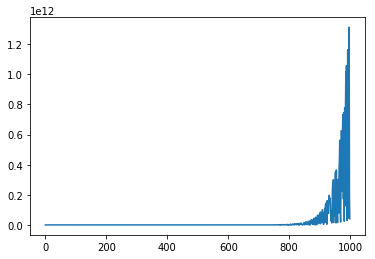

In [15]:
ener_T = []

for i in range(len(xx)):
    ener_T.append((((1/2)*(m+M)*vxx[i]*vxx[i])+(l*m*vxx[i]*vww[i]*cos(ww[i]))+((1/2)*m*l*vww[i]*vww[i])+(m*l*cos(ww[i])*g)))

plt.plot(ener_T)
plt.show()

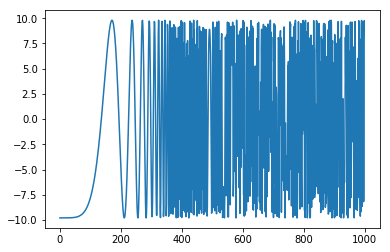

In [18]:
ener_U = []

for i in range(len(xx)):
    ener_U.append((-m*g*l*cos(ww[i])))

plt.plot(ener_U)
plt.show()

In [ ]:
ener_M = []

for i in range(len(xx)):
    ener_M.append(((((1/2)*(m+M)*vxx[i]*vxx[i])+(l*m*vxx[i]*vww[i]*cos(ww[i]))+((1/2)*m*l*vww[i]*vww[i])+(m*l*cos(ww[i])*g)))+(-m*g*l*cos(ww[i])))

plt.plot(ener_M)
plt.show()